In [3]:
import numpy as np
import matplotlib.pyplot as plt
from gp import *
import time

In [9]:
def one_dim_GPR(dim):
    
    z = d_loader.get_z(training=False)
    y = d_loader.get_y(training=False)


    z_train = d_loader.get_z(training=True)
    y_train = d_loader.get_y(training=True)


    if dim == 'x':
        # x velocity
        z_train = z_train[:,7].reshape(-1,1)
        z = z[:,7].reshape(-1,1)

        y_train = y_train[:,0].reshape(-1,1)
        y = y[:,0].reshape(-1,1)
        
    if dim == 'y':
        # y velocity
        z_train = z_train[:,8].reshape(-1,1)
        z = z[:,8].reshape(-1,1)

        y_train = y_train[:,1].reshape(-1,1)
        y = y[:,1].reshape(-1,1)
        
    if dim == 'z':
        # z velocity
        z_train = z_train[:,9].reshape(-1,1)
        z = z[:,9].reshape(-1,1)

        y_train = y_train[:,2].reshape(-1,1)
        y = y[:,2].reshape(-1,1)
    
    theta0 = [6,1,1] # Kernel variables
    x_query = np.arange(-20,20,0.05).reshape(-1,1)

    model = GPR(z_train, y_train, covariance_function=RBF, theta=theta0)
    # Before ML optimization
    mean_b, std_b = model.predict(x_query, std=True)

    # Calculate the RMS over all samples
    mean_test_before = model.predict(z, std=False)
    rms_before = np.sqrt(np.mean((y - mean_test_before)**2))

    # ML optimization
    model.maximize_likelyhood()

    # After optimization
    mean_a, std_a = model.predict(x_query, std=True)

    # Calculate the RMS over all samples
    mean_test_after = model.predict(z, std=False)
    rms_after = np.sqrt(np.mean((y - mean_test_after)**2))

    print(f'RMS before = {rms_before}')
    print(f'RMS after = {rms_after}')
    
    plt.figure(figsize=(10,6), dpi=100)
    plt.subplot(1,2,1)
    plt.plot(x_query, mean_b)
    plt.scatter(z, y, s=1, c='g')
    plt.plot(z_train, y_train, 'x')
    plt.fill_between(x_query.reshape(-1), mean_b.reshape(-1) - std_b, mean_b.reshape(-1) + std_b,
                     color='gray', alpha=0.2)
    plt.xlabel('Velocity in x [ms-1]')
    plt.ylabel('Acceleration error in x [ms-2]')
    plt.title(f'GP Before ML optimization, rms = {rms_before:.2f}')
    plt.legend(('GP interpolation', 'Measured samples', 'Training samples'))


    plt.subplot(1,2,2)
    plt.plot(x_query, mean_a)
    plt.scatter(z, y, s=1, c='g')
    plt.plot(z_train, y_train, 'x')
    plt.fill_between(x_query.reshape(-1), mean_a.reshape(-1) - std_a, mean_a.reshape(-1) + std_a,
                     color='gray', alpha=0.2)
    plt.xlabel('Velocity in x [ms-1]')
    plt.ylabel('Acceleration error in x [ms-2]')
    plt.title(f'GP Before ML optimization, rms = {rms_after:.2f}')
    plt.legend(('GP interpolation', 'Measured samples', 'Training samples'))

Size of feature training data = (10, 1)
Size of output training data = (10, 1)
Maximizing the likelyhood function for GP
Hyperparameters before optimization = [6, 1, 1]
Size of feature training data = (10, 1)
Size of output training data = (10, 1)
Optimization done
Hyperparameters after optimization = [7.65654608 9.17159459 0.01      ]
RMS before = 0.8346465133798624
RMS after = 0.05303183936737372


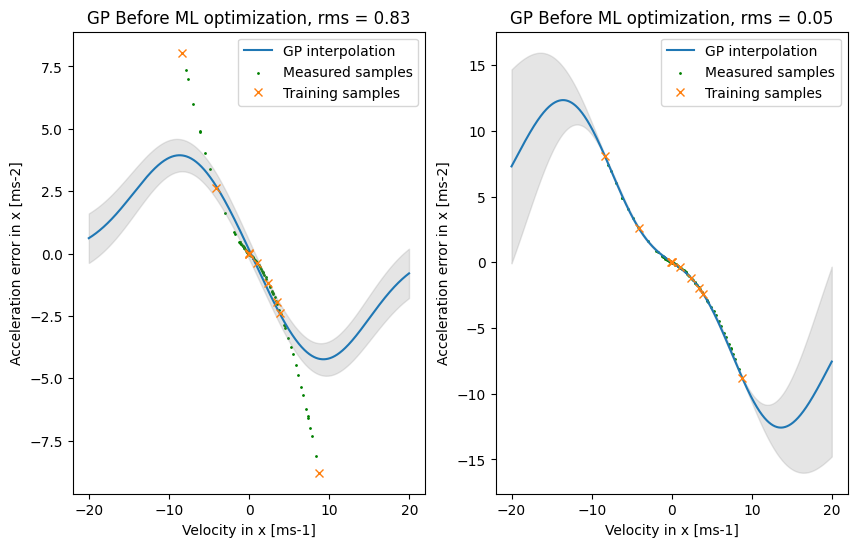

In [10]:
one_dim_GPR('x')

Size of feature training data = (10, 1)
Size of output training data = (10, 1)
Maximizing the likelyhood function for GP
Hyperparameters before optimization = [1, 1, 1]
Size of feature training data = (10, 1)
Size of output training data = (10, 1)
Optimization done
Hyperparameters after optimization = [1.10763242e+01 2.18660583e+01 1.00000000e-02]
RMS before = 4.120628518840445
RMS after = 0.5051500164133942


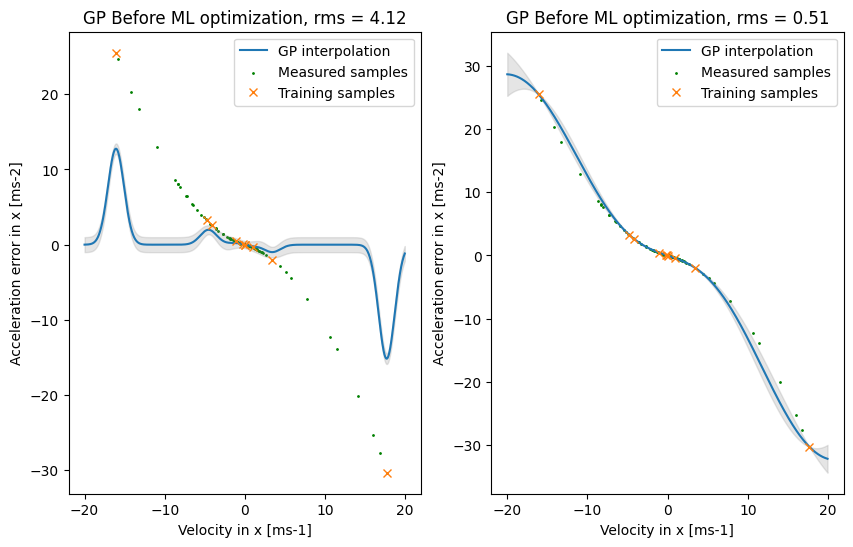

In [7]:
one_dim_GPR('y')

Size of feature training data = (10, 1)
Size of output training data = (10, 1)
Maximizing the likelyhood function for GP
Hyperparameters before optimization = [1, 1, 1]
Size of feature training data = (10, 1)
Size of output training data = (10, 1)
Optimization done
Hyperparameters after optimization = [9.17141264e+00 1.82504375e+01 1.00000000e-02]
RMS before = 5.846711884919181
RMS after = 0.21895130588986708


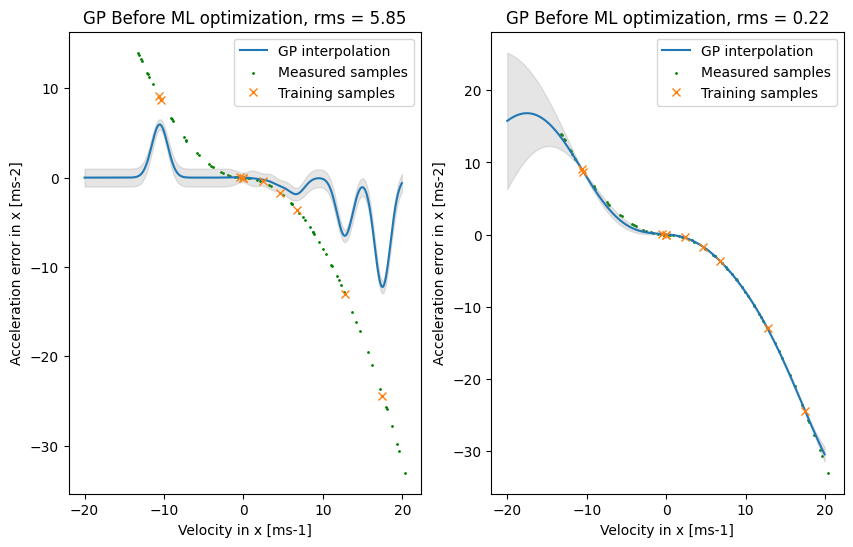

In [8]:
one_dim_GPR('z')